In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

%matplotlib inline
plt.style.use('default')
my_colors = [u'#1f77b4',
 u'#ff7f0e',
 u'#2ca02c',
 u'#d62728',
 u'#9467bd',
 u'#8c564b',
 u'#e377c2',
 u'#7f7f7f',
 u'#bcbd22',
 u'#17becf',
 u'#f2f2f2',            
 u'#fffa00',
 u'#000000',
 u'#b6ff9b',
 u'#005400',
 u'#ffc28c',
 u'#d69c68',
 u'#c1c1c1',
 u'#fbccff',
 u'#ff5e5e',
 u'#00edb2',
 u'#ffca1e',
 u'#933f3f']
!pwd

/global/projectb/scratch/jzz0026/Sorgum_root_microbes_project/Sorgum_root_microbme/metagenome_assembly_spades/img_psedomonas_genome


## Function of generate Plot (Posi vs %id and Coverage) and Table of island region

In [44]:
##get df of start and end position of genome island
def posi_island_df(nums): 
    #nums = [1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14]
    ranges = sum((list(t) for t in zip(nums, nums[1:]) if t[0]+1 != t[1]), [])
    iranges = iter(nums[0:1] + ranges + nums[-1:])
    df = pd.DataFrame([[str(n),str(next(iranges))] for n in iranges])
    df.columns = ["Start position","End position"]
    return df

#pwd1:files with id% of mapped reads vs position (mapping with 60% mini id) 
#size: size of points in the subplot below 
#alpha: transparency of points in the subplot below
#pwd2:files with coverages vs position (mapping with 80% mini id) 
#linewidth: line width of the subplot above 
#per: the threadhold for the coverage (< the pecentage of the average coverage)
#lenth: island region table, show only region with > x length
def plot_id_posi(pwd1,pwd2,size,alpha,linewidth,per,lenth):
    df1 = pd.read_csv(pwd1,"\t",header=None).iloc[:,-3:]
    #df1.iloc[0,0].split()
    df2 = df1.sort_values(2)
    df3 = pd.read_csv(pwd2,header=None,sep="\t")
    
    ## plot
    fig = plt.figure(figsize=(10, 4))
    gs = gridspec.GridSpec(2, 1)
    gs.update(wspace=0.025, hspace=0)
    
    plt.subplot(gs[0])
    plt.plot(df3[1],df3[2],linewidth=linewidth)
    plt.ylabel("Coverage \n (reads with 80% identity)")
    plt.subplot(gs[1])
    plt.scatter(df2[2],df2[3],s=size,alpha=alpha)
    plt.ylabel("% identity")
    plt.xlabel("The position in the genome")

    fig.suptitle(re.split(":",df1.iloc[0,0])[0] + " | " +pwd2.split("_")[3])
    
    ## organize the table of island region
    df_island_pos = df3[df3[2] < (np.average(df3[2]) * per)] ## only show region of coverage < x% of average
    nums = list(df_island_pos[1])
    dft = posi_island_df(nums)
    dft = dft.astype("float")
    dft["Region length"] = dft.iloc[:,1] - dft.iloc[:,0]
    dft = dft[dft["Region length"] > lenth] ## only show region of island with length > x
    
    return plt.show(),dft


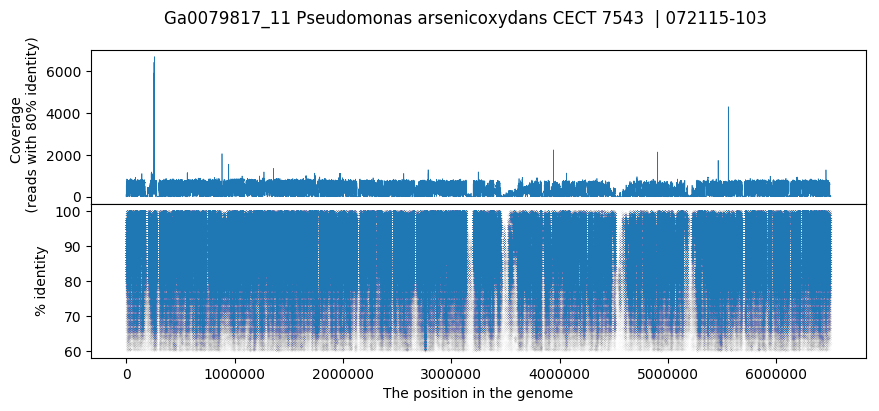

,Start position,End position,Region length
20,19211.0,20988.0,1777.0
86,95238.0,96820.0,1582.0
98,103851.0,106488.0,2637.0
131,137528.0,138833.0,1305.0
132,139235.0,140840.0,1605.0
160,173225.0,196558.0,23333.0
161,196767.0,198554.0,1787.0
187,213509.0,215151.0,1642.0
196,216205.0,217484.0,1279.0
198,218005.0,219766.0,1761.0


In [45]:
fig, df = plot_id_posi("2636416065_Sorghum_microbiome_072115-103_1_header_id60.txt","genomecov/2636416065_Sorghum_microbiome_072115-103_1.coverage",0.01,0.02,0.5,0.5,1000)
df

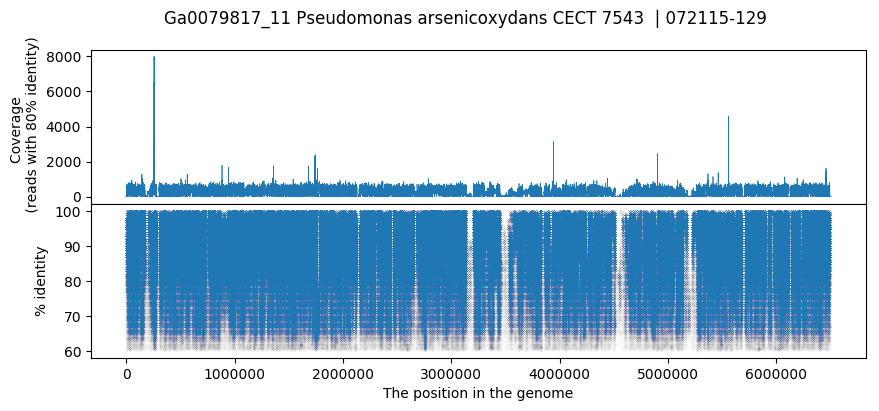

,Start position,End position,Region length
70,95272.0,96817.0,1545.0
79,103847.0,106481.0,2634.0
109,137502.0,138856.0,1354.0
110,139238.0,140867.0,1629.0
133,173210.0,196534.0,23324.0
134,196743.0,197853.0,1110.0
150,216136.0,217511.0,1375.0
165,239219.0,240278.0,1059.0
187,281762.0,303264.0,21502.0
220,330078.0,331256.0,1178.0


In [46]:
fig, df = plot_id_posi("2636416065_Sorghum_microbiome_072115-129_1_header_id60.txt","genomecov/2636416065_Sorghum_microbiome_072115-129_1.coverage",0.01,0.02,0.5,0.5,1000)
df


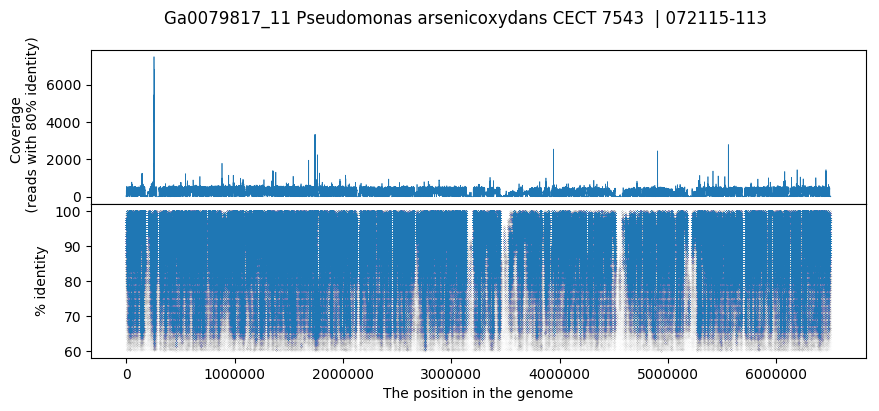

,Start position,End position,Region length
65,95284.0,96829.0,1545.0
74,103840.0,106462.0,2622.0
87,132589.0,133736.0,1147.0
95,137474.0,138848.0,1374.0
96,139220.0,140873.0,1653.0
109,173228.0,196540.0,23312.0
110,196797.0,198511.0,1714.0
121,215016.0,216338.0,1322.0
134,239200.0,240265.0,1065.0
144,281762.0,303264.0,21502.0


In [47]:
fig, df = plot_id_posi("2636416065_Sorghum_microbiome_072115-113_1_header_id60.txt","genomecov/2636416065_Sorghum_microbiome_072115-113_1.coverage",0.01,0.02,0.5,0.5,1000)
df